In [443]:
import matplotlib.pyplot as plt
import numpy as np

In [444]:
# Se crea una clase Restriccion, la cual define los valores y funciones que se le asignarán a las restricciones del programa

class Restriccion:
    
    # Valores iniciales
    # x1 y x2 corresponden a las variables de decisión
    # c corresponde al valor de la restricción
    # tipo corresponde si es una restricción <=, >= o =
    def __init__(self, x1, x2, c, tipo):
        self.x1 = x1
        self.x2 = x2
        self.c = c
        self.valorX0 = 0 # Valor que toma el punto de la restricción en el eje x 
        self.valorY0 = 0 # Valor que toma el punto de la restricción en el eje y
        self.listaX = [] # Arreglo con los valores x de las restricciones
        self.listaY = [] # Arreglo con los valores y de las restricciones
        self.totalX = []
        self.totalY = []
        self.tipo = tipo
        
    # Función que agrega una restricción según el tipo que corresponda
    # Según el tipo de la restricción se define la manera en que establece la restricción
    def agregarRestriccion(self, x1, x2, c, tipo):
        if tipo == 0:
            self.x1 = x1
            self.x2 = x2
            self.c = c
            self.tipo = tipo
        elif tipo == 1:
            self.x1 = -x1
            self.x2 = -x2
            self.c = c
            self.tipo = tipo
    
    # Función que marca los puntos de intersección que se forman con cada restricción 
    def puntosEjes(self):
        if self.x1 == 0:
            #0x+3y=6
            self.valorY0 = self.c/self.x2
        elif self.x2 == 0:
            #3x+0y=6
            self.valorX0 = self.c/self.x1
        else:
            #0x+3y=6
            self.valorX0 = self.c/self.x1
            self.valorY0 = self.c/self.x2
    
    # Función que despeja las ecuaciones producidas en las restricciones    
    # Se agregan los puntos de las restricciones al arreglo de puntos    
    def despejar(self):
        self.totalX = np.arange(0,float(self.valorX0)+1)
        self.totalY = np.arange(0,float(self.valorY0)+1)
        if self.x1 == 0.0:
            self.listaY = (self.c+0*self.totalX)/self.x2
            #0x+3y=6
        elif self.x2 == 0.0:
            #2x+0y=6
            self.listaX = (self.c-0*self.totalX)/self.x1
        else:
            #4x+3y=6
            self.listaY = (self.c-self.x1*self.totalX)/self.x2
            
    # Función que grafica las ecuaciones en base a los puntos almacenados en listaX y listaY
    def graficar(self):
        plt.plot(self.listaY, "red")
        plt.plot(self.listaX, "pink")

In [445]:
# Se crea la clase función objetivo con el fin de tener los elementos de la función almacenadas en el objeto
# x1 y x2 corresponden a las variables de deicisión
# tipo corresponde al tipo de función, maximizar o minimizar
# z corresponde a la función objetivo
# puntosFactibles es un arreglo con los posibles puntos que podría representar la solución
class funcionObjetivo:
    def __init__(self,x1,x2,tipo):
        self.x1 = x1
        self.x2 = x2
        self.tipo = tipo
        self.z = 0
        self.pFactible = []
        
    def puntosFactibles(self, listaResultados, arregloRestricciones, plt):
        i = 0
        j = 0
        cuenta = 0
        for p in listaResultados:
            for restriccion in arregloRestricciones:
                if restriccion.tipo == 1:
                    if restriccion.x1*p[1]+restriccion.x2*p[2] <= restriccion.c:
                        cuenta += 1
                elif restriccion.tipo == 0:
                    if restriccion.x1*p[1]+restriccion.x2*p[2] >= restriccion.c:
                        cuenta += 1
                else:
                    if restriccion.x1*p[1]+restriccion.x2*p[2] == restriccion.c:
                        cuenta += 1
            if cuenta == len(arregloRestricciones):
                self.pFactible.append((p[1], p[2], p[3]))
                plt.scatter(p[1], p[2], color="k", marker=(5, 0), s=80)
            cuenta = 0
            
    def solucion(self, resultados, mayorX):
        p = []
        cuenta = 0
        menor = 100
        mayor = 0
        print(len(self.pFactible))
        if len(self.pFactible) < 1:
            plt.title("Solucion No Factible")
        elif len(self.pFactible) == 1:
            if self.tipo == "max":
                plt.title("Con Solucion No Acotada")
            else:
                p = (self.pFactible[0][0], self.pFactible[0][1])
                print(p)
                plt.title("Con Unica Solucion")
                listaX = np.arange(0, float(mayorX)+1)
                listaY = (mayor-self.x1*listaX)/self.x2
                plt.plot(listaY, color="r", label="z = "+str(mayor))
                plt.annotate(r'Solucion: x='+str(p[0])+' y= '+str(p[1])+'', xy=(p[0], p[1]), xycoords='data', xytext=(
                    p[0]+5, p[1]+5), textcoords='offset points', fontsize=12, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
                plt.scatter(p[0], p[1], color="m", s=80)

        else:
            if self.tipo == "max":
                for f in self.pFactible:
                    if f[2] >= mayor:
                        mayor = f[2]
                        p = (f[0], f[1])
                for f in self.pFactible:
                    if f[2] == mayor:
                        cuenta += 1
                if cuenta >= 2:
                    plt.title("Con Multiples Soluciones")
                    listaX = np.arange(0, float(mayorX)+1)
                    listaY = (mayor-self.x1*listaX)/self.x2
                    plt.plot(listaY, color="r", label="z = "+str(mayor))
                else:
                    plt.title("Con Unica Solucion")
                    listaX = np.arange(0, float(mayorX)+1)
                    listaY = (mayor-self.x1*listaX)/self.x2
                    plt.plot(listaY, color="r", label="z = "+str(mayor))
                    plt.annotate(r'Solucion: x='+str(p[0])+' y= '+str(p[1])+'', xy=(p[0], p[1]), xycoords='data', xytext=(
                        p[0]+5, p[1]+5), textcoords='offset points', fontsize=12, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
                    plt.scatter(p[0], p[1], color="m", s=80)
            else:
                print("min")
                for f in self.pFactible:
                    if f[2] <= menor:
                        menor = f[2]
                        p = (f[0], f[1])
                for f in self.pFactible:
                    if f[2] == menor:
                        cuenta += 1
                if cuenta >= 2:
                    listaX = np.arange(0, float(mayorX)+1)
                    listaY = (menor-self.x1*listaX)/self.x2
                    plt.plot(listaY, color="r", label="z = "+str(menor))
                    plt.title("Con Solucion Multiple")
                else:
                    listaX = np.arange(0, float(mayorX)+1)
                    listaY = (menor-self.x1*listaX)/self.x26
                    plt.plot(listaY, color="r", label="z = "+str(menor))
                    plt.annotate(r'Solucion: x='+str(p[0])+' y= '+str(p[1])+'', xy=(p[0], p[1]), xycoords='data',
                                 xytext=(p[0]+5, p[1]+5), textcoords='offset points', fontsize=12,
                                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
                plt.scatter(p[0], p[1], color="m", s=80)
                plt.title("Con Unica Solucion")

In [446]:
# Función que recibe un valor numérico
def inputNumerico(string):
    while(True):
        valor = float(input(string))
        if(isinstance(valor, float)):
            return valor
        else:
            print("Error, ingrese un valor numerico")

In [447]:
# Función que recibe los valores de la función objetivo: El tipo de función, los coeficientes x1 y x2
def inputMinMax(string):
    while(True):
        value = str(input(string))
        if value=="min":
            return value
        elif value=='max':
            return value
        else:
            print("Error, ingrese min o max nuevamente")

In [448]:

print("Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2")
X1_0 = float(inputNumerico("Coeficiente de X1 de FO: "))
X2_0 = float(inputNumerico("Coeficiente de X2 de FO: "))
print("Ingrese min para Minimizacion y max para Maximizacion")
tipo = str(inputMinMax("min o max : "))
fObjetivo = funcionObjetivo(X1_0,X2_0,tipo)


Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2
Ingrese min para Minimizacion y max para Maximizacion


In [449]:
# Función para recibir la cantidad de restricciones
def validacionCantidadR(string):
    while(True):
        value = str(input(string))
        if value.isdigit():
            r = int(value)
            if r < 6:
                return r
            else:
                print("Ingrese un valor menor o igual a 5")
        else:
            print("Ingrese un valor valido")

In [450]:
print("Ingrese cantidad de restricciones (5 o menos)")
r = validacionCantidadR("Valor: ")

Ingrese cantidad de restricciones (5 o menos)


In [451]:
# Función que revisa el tipo de restricción y agrega los valores de la restricción al arreglo de restricciones
def validacionIgualdad(string):
    while(True):
        igualdad = input(string)
        if igualdad=="<=":
            return 0
        elif igualdad==">=":
            return 1
        elif igualdad=="=":
            return 2
        else:
            print("Ingrese un signo valido")

In [452]:
arregloRestricciones = []
arregloRestricciones.clear()
for index in range(r):
    print("Ingrese los coeficientes para la restriccion R",index+1,": __X1 + __X2 (<=, >=, =) C")
    R1 = float(inputNumerico("Coeficiente de X1: "))
    R2 = float(inputNumerico("Coeficiente de X2: "))
    I = float(validacionIgualdad("Signo igualdad: "))
    C = float(inputNumerico("Coeficiente C: "))
    restriccion34 = Restriccion(R1,R2,C,I)
    arregloRestricciones.append(restriccion34)
        


Ingrese los coeficientes para la restriccion R 1 : __X1 + __X2 (<=, >=, =) C
Ingrese los coeficientes para la restriccion R 2 : __X1 + __X2 (<=, >=, =) C


In [453]:
# Función que explora el arreglo de restricciones para agregar los puntos a una lista de vértices
# En a y b se encuentra la solución de un sistema de ecuaciones para x e y 
def hallarVertices():
    i = 0
    j = i+1
    for restriccion in arregloRestricciones:
        listaVertices.append((restriccion.valorX0, 0.))
        listaVertices.append((0., restriccion.valorY0))
    while i < len(arregloRestricciones)-1:
        while j < len(arregloRestricciones):
            try:
                a = np.array([[arregloRestricciones[i].x1, arregloRestricciones[i].x2],
                               [arregloRestricciones[j].x1, arregloRestricciones[j].x2]])
                b = np.array([arregloRestricciones[i].c,
                              arregloRestricciones[j].c])
                punto = np.linalg.solve(a, b)
                listaVertices.append((punto[0], punto[1]))
            except:
                pass
            j += 1
        i += 1
        j = i+1
    
    i = 0
    while i < len(listaVertices):
        if listaVertices[i][0] < 0 or listaVertices[i][1] < 0:
            listaVertices.remove(listaVertices[i])
        i += 1
        
    new = []
    for i in listaVertices:
        if i not in new:
            new.append(i)
    
    listaVertices[0:len(listaVertices)] = new
    print("listaVertices: ", listaVertices)


listaVertices:  [(0, 0), (3.0, 0.0), (0.0, 2.0)]
1


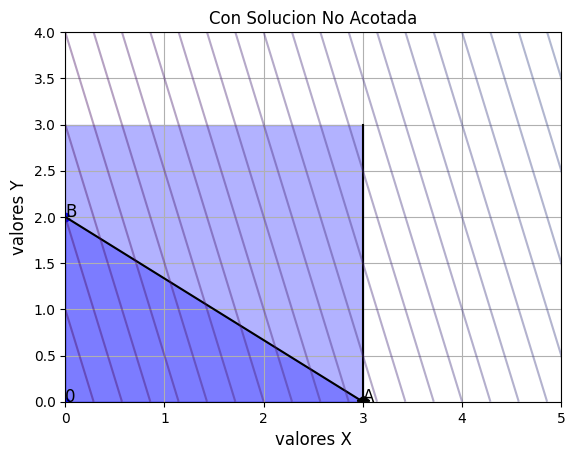

In [454]:

from operator import concat

# En puntos se almacenan los puntos de cada vertice
# mayorX y mayorY son utilizados para dimensionar el tamaño del gráfico
puntos = []
mayorX = 0
mayorY = 0

for restriccion in arregloRestricciones:
    restriccion.puntosEjes()
    if abs(restriccion.valorX0) > mayorX:
        mayorX = abs(restriccion.valorX0)
    if abs(restriccion.valorY0) > mayorY:
        mayorY = restriccion.valorY0
hallarVertices()

# Estas letras muestran los puntos del gráfico y son asignadas en el siguiente for
letras = ["0", "A", "B", "C", "D", "E", "F", "G",
          "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]

i = 0
for vertice in listaVertices:
    plt.annotate(letras[i], xy=(vertice[0], vertice[1]), fontsize=12)
    plt.scatter(vertice[0], vertice[1], color="b")
    i += 1
    
i = 0
listaResultados = []
colores = ["b", "g", "c", "m", "y"]
# Se agregan los resultados encontrados en la lista de vertices
for p in listaVertices:
    listaResultados.append(
        (letras[i], p[0], p[1], fObjetivo.x1*p[0]+fObjetivo.x2*p[1]))
    i += 1

# Se grafican las ecuaciones de las restricciones almacenadas en su arreglo
for res in arregloRestricciones:
    if mayorX <= 0:
        mayorX = mayorY = 10
    res.valorX0 = mayorX
    res.valorY0 = mayorY
    
    res.despejar()
    
    helpY = np.arange(0,float(len(res.listaX)))
    helpX = np.arange(0,float(len(res.listaY)))
    plt.plot(helpX, res.listaY, "k")
    plt.plot(res.listaX, helpY, "k")
   
    seleccion = np.random.randint(len(colores))
    if res.tipo == 0:
        if res.x2 == 0:
            plt.fill_between(res.totalX,res.listaX,color='blue',alpha=0.3)
        else:
            plt.fill_between(res.totalX,res.listaY,color='blue',alpha=0.3)
plt.grid(True)   
plt.ylim(0, mayorY+2)
plt.xlim(0, mayorX+2)
plt.xlabel('valores X', fontsize=12)
plt.ylabel('valores Y', fontsize=12)

fObjetivo.puntosFactibles(listaResultados, arregloRestricciones, plt)
fObjetivo.solucion(listaResultados, mayorX)

a = b = np.linspace(0,20,1000)
X,Y = np.meshgrid(a,b)
Z = fObjetivo.x1*X + fObjetivo.x2*Y
plt.contour(X,Y,Z,100,alpha=0.4)
plt.show()

In [455]:
print(fObjetivo.pFactible)

[(3.0, 0.0, 21.0)]
